$$ Employee Turnover Analysis $$

# Project Statement

Portobello Tech is an app innovator who has devised an intelligent way of
predicting employee turnover within the company. It periodically evaluates
employees' work details, including the number of projects they worked on,
average monthly working hours, time spent in the company, promotions in the
last five years, and salary level.
Data from prior evaluations shows the employees’ satisfaction in the workplace.
The data could be used to identify patterns in work style and their interest in
continuing to work for the company.
The HR Department owns the data and uses it to predict employee turnover.
Employee turnover refers to the total number of workers who leave a company
over time.
As the ML Developer assigned to the HR Department, you have been asked to
create ML programs to:
1. Perform data quality checks by checking for missing values, if any.
2. Understand what factors contributed most to employee turnover at EDA.
3. Perform clustering of employees who left based on their satisfaction and
evaluation.
4. Handle the left Class Imbalance using the SMOTE technique.
5. Perform k-fold cross-validation model training and evaluate performance.
6. Identify the best model and justify the evaluation metrics used.
7. Suggest various retention strategies for targeted employees.

# Solution

Import the pandas and NumPy libraries.

Read the HR_comma_sep.csv file into a DataFrame

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('HR_comma_sep.csv')

In [3]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


### 1. Perform data quality checks by checking for missing values, if any.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14999 entries, 0 to 14998
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   satisfaction_level     14999 non-null  float64
 1   last_evaluation        14999 non-null  float64
 2   number_project         14999 non-null  int64  
 3   average_montly_hours   14999 non-null  int64  
 4   time_spend_company     14999 non-null  int64  
 5   Work_accident          14999 non-null  int64  
 6   left                   14999 non-null  int64  
 7   promotion_last_5years  14999 non-null  int64  
 8   sales                  14999 non-null  object 
 9   salary                 14999 non-null  object 
dtypes: float64(2), int64(6), object(2)
memory usage: 1.1+ MB


In [5]:
cols = list(df.select_dtypes(np.object_).columns)
df[cols] = df[cols].astype('string')
df.dtypes

satisfaction_level              float64
last_evaluation                 float64
number_project                    int64
average_montly_hours              int64
time_spend_company                int64
Work_accident                     int64
left                              int64
promotion_last_5years             int64
sales                    string[python]
salary                   string[python]
dtype: object

In [6]:
df.isna().sum()

satisfaction_level       0
last_evaluation          0
number_project           0
average_montly_hours     0
time_spend_company       0
Work_accident            0
left                     0
promotion_last_5years    0
sales                    0
salary                   0
dtype: int64

since all the data is non-null there are no empty entries.

### 2. Understand what factors contributed most to employee turnover at EDA.


In [7]:
df['salary'].unique()

<StringArray>
['low', 'medium', 'high']
Length: 3, dtype: string

In [8]:
salary_mapping = {'low': 1, 'medium': 2, 'high':3}
df['salary'] = df['salary'].map(salary_mapping)

In [9]:
df['salary'].unique()

array([1, 2, 3], dtype=int64)

In [10]:
df['sales'].unique()

<StringArray>
[      'sales',  'accounting',          'hr',   'technical',     'support',
  'management',          'IT', 'product_mng',   'marketing',       'RandD']
Length: 10, dtype: string

In [11]:
sales_mapping = {'sales':1,  'accounting':2,          'hr':3,   'technical':4,     'support':5,
  'management':6,          'IT':7, 'product_mng':8,   'marketing':9,       'RandD':10}
df['sales'] = df['sales'].map(sales_mapping)

In [12]:
df['sales'].unique()

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10], dtype=int64)

In [13]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,1,1
1,0.80,0.86,5,262,6,0,1,0,1,2
2,0.11,0.88,7,272,4,0,1,0,1,2
3,0.72,0.87,5,223,5,0,1,0,1,1
4,0.37,0.52,2,159,3,0,1,0,1,1


In [14]:
df.describe()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
count,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000,14999.000000
mean,0.612834,0.716102,3.803054,201.050337,3.498233,0.144610,0.238083,0.021268,4.339823,1.594706
std,0.248631,0.171169,1.232592,49.943099,1.460136,0.351719,0.425924,0.144281,2.820837,0.637183
min,0.090000,0.360000,2.000000,96.000000,2.000000,0.000000,0.000000,0.000000,1.000000,1.000000
25%,0.440000,0.560000,3.000000,156.000000,3.000000,0.000000,0.000000,0.000000,1.000000,1.000000
50%,0.640000,0.720000,4.000000,200.000000,3.000000,0.000000,0.000000,0.000000,4.000000,2.000000
75%,0.820000,0.870000,5.000000,245.000000,4.000000,0.000000,0.000000,0.000000,7.000000,2.000000
max,1.000000,1.000000,7.000000,310.000000,10.000000,1.000000,1.000000,1.000000,10.000000,3.000000


### 2.1 Draw a heatmap of the correlation matrix between all numerical features or columns in the data.

In [15]:
import matplotlib.pyplot as plt
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm')

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
satisfaction_level,1.000000,0.105021,-0.142970,-0.020048,-0.100866,0.058697,-0.388375,0.025605,0.015413,0.050022
last_evaluation,0.105021,1.000000,0.349333,0.339742,0.131591,-0.007104,0.006567,-0.008684,0.011855,-0.013002
number_project,-0.142970,0.349333,1.000000,0.417211,0.196786,-0.004741,0.023787,-0.006064,0.005577,-0.001803
average_montly_hours,-0.020048,0.339742,0.417211,1.000000,0.127755,-0.010143,0.071287,-0.003544,-0.002387,-0.002242
time_spend_company,-0.100866,0.131591,0.196786,0.127755,1.000000,0.002120,0.144822,0.067433,-0.001611,0.048715
Work_accident,0.058697,-0.007104,-0.004741,-0.010143,0.002120,1.000000,-0.154622,0.039245,0.019215,0.009247
left,-0.388375,0.006567,0.023787,0.071287,0.144822,-0.154622,1.000000,-0.061788,-0.043814,-0.157898
promotion_last_5years,0.025605,-0.008684,-0.006064,-0.003544,0.067433,0.039245,-0.061788,1.000000,0.015170,0.098119
sales,0.015413,0.011855,0.005577,-0.002387,-0.001611,0.019215,-0.043814,0.015170,1.000000,0.033415
salary,0.050022,-0.013002,-0.001803,-0.002242,0.048715,0.009247,-0.157898,0.098119,0.033415,1.000000


### 2.2 Draw the distribution plot of:
     - Employee Satisfaction (use column satisfaction_level)
     - Employee Evaluation (use column last_evaluation)
     - Employee Average Monthly Hours (use column average_montly_hours)

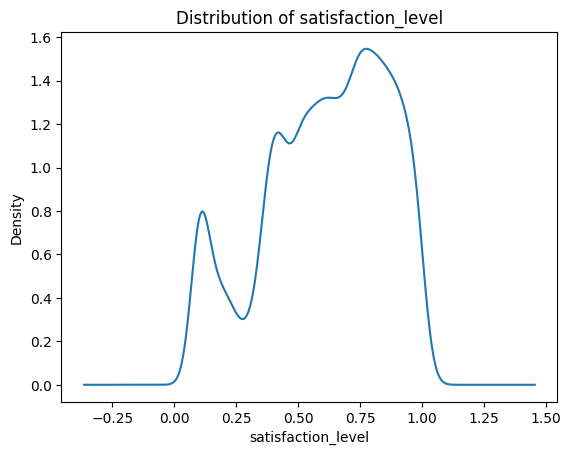

In [16]:
df['satisfaction_level'].plot(kind='kde', title='Distribution of satisfaction_level')
plt.xlabel('satisfaction_level')
plt.ylabel('Density')
plt.show()

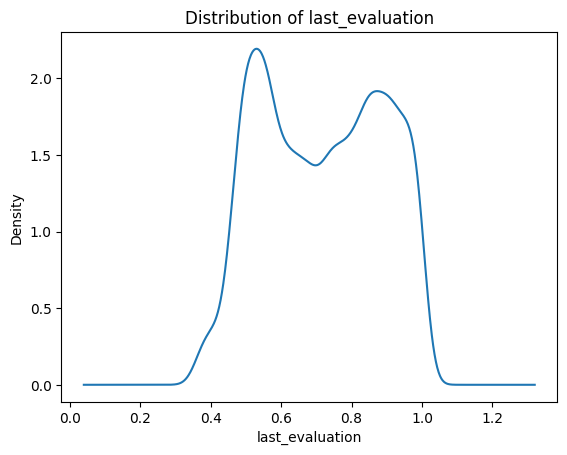

In [17]:
df['last_evaluation'].plot(kind='kde', title='Distribution of last_evaluation')
plt.xlabel('last_evaluation')
plt.ylabel('Density')
plt.show()

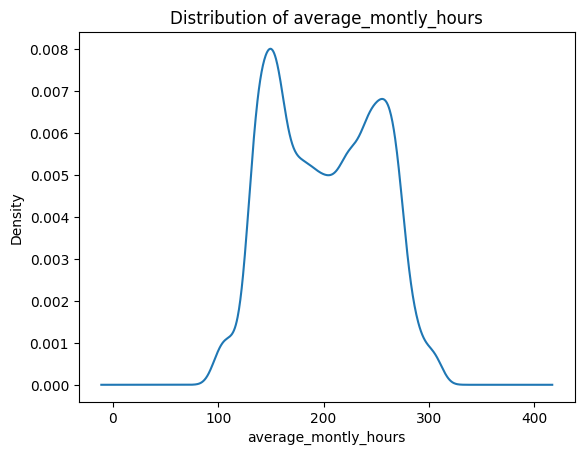

In [18]:
df['average_montly_hours'].plot(kind='kde', title='Distribution of average_montly_hours')
plt.xlabel('average_montly_hours')
plt.ylabel('Density')
plt.show()

### 2.3. Draw the bar plot of the employee project count of both employees who left and stayed in the organization (use column number_project and hue        column left), and give your inferences from the plot.

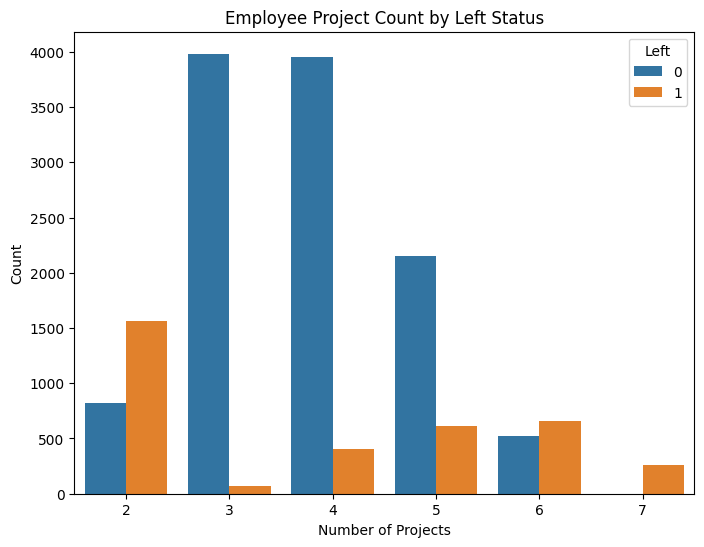

In [19]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.countplot(x='number_project', hue='left', data=df)
plt.title("Employee Project Count by Left Status")
plt.xlabel("Number of Projects")
plt.ylabel("Count")
plt.legend(title="Left", loc="upper right")
plt.show()

### Inferences:
- Employees with only 2 projects tend to leave the organization.
- Employees with 3, 4  or 5 projects tend to stay.
- Employees with 6 projects more tending towards leave than stay
- Employees with extreme project counts (1 or 7) have no or very few data points.

### 3. Perform clustering of employees who left based on their satisfaction and evaluation.
### 3.1. Choose columns satisfaction_level, last_evaluation, and left.

In [20]:
selected_columns = ['satisfaction_level', 'last_evaluation', 'left']
df_selected = df[selected_columns]

### 3.2. Do K-means clustering of employees who left the company into 3 clusters.

C:\Users\ngajula\AppData\Local\Temp\ipykernel_19904\3257700820.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_selected['cluster'] = kmeans.fit_predict(df_selected[['satisfaction_level', 'last_evaluation']])


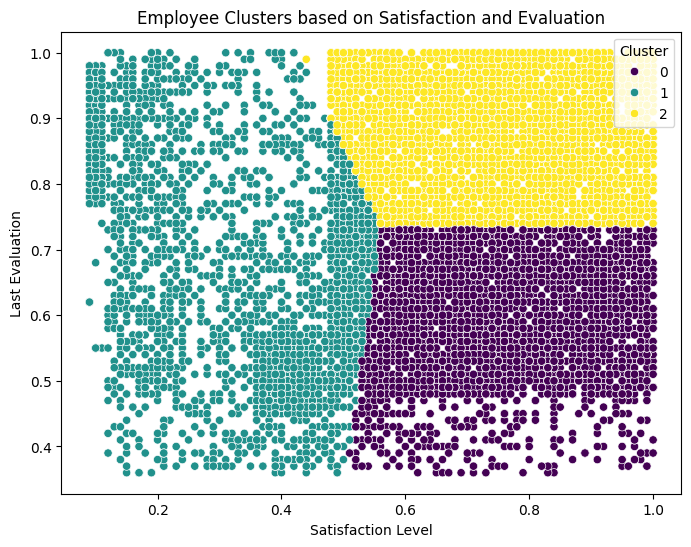

In [21]:
from sklearn.cluster import KMeans

# Perform K-means clustering
kmeans = KMeans(n_clusters=3, random_state=42)
df_selected['cluster'] = kmeans.fit_predict(df_selected[['satisfaction_level', 'last_evaluation']])

plt.figure(figsize=(8, 6))
sns.scatterplot(x='satisfaction_level', y='last_evaluation', hue='cluster', data=df_selected, palette='viridis')
plt.title("Employee Clusters based on Satisfaction and Evaluation")
plt.xlabel("Satisfaction Level")
plt.ylabel("Last Evaluation")
plt.legend(title="Cluster", loc="upper right")
plt.show()

### 3.3. Based on the satisfaction and evaluation factors, give your thoughts on the employee clusters.
    - Cluster 0 (Purple): Employees with high satisfaction and moderate evaluation.
    - Cluster 1 (Green):  Employees with high satisfaction and moderate/high evaluation.
    - Cluster 2 (Yellow): Employees with high satisfaction and high evaluation.

### 4. Handle the left Class Imbalance using the SMOTE technique.
### 4.1. Pre-process the data by converting categorical columns to numerical columns by:
    - Separating categorical variables and numeric variables
    - Applying get_dummies() to the categorical variables
    - Combining categorical variables and numeric variables


In [22]:
df = pd.read_csv('HR_comma_sep.csv')

In [23]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [24]:
# - Separating categorical variables and numeric variables
categorical_columns = ['sales', 'salary']
 
numeric_columns = ['satisfaction_level', 'last_evaluation', 'number_project', 'average_montly_hours', 'time_spend_company', 'Work_accident', 'left', 'promotion_last_5years']


In [25]:
# Applying get_dummies() to the categorical variables
df_categorical = pd.get_dummies(df[categorical_columns], drop_first=True)


In [26]:
# - Combining categorical variables and numeric variables
df_processed = pd.concat([df[numeric_columns], df_categorical], axis=1)

In [27]:
df_processed.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,1,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,1,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,1,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,1,0,False,False,False,False,False,False,True,False,False,True,False


### 4.2 Do the stratified split of the dataset to train and test in the ratio 80:20 with random_state=123.

In [28]:
from sklearn.model_selection import train_test_split

In [29]:
feature_df = df_processed.drop(['left'], axis = 1)

In [30]:
feature_df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,promotion_last_5years,sales_RandD,sales_accounting,sales_hr,sales_management,sales_marketing,sales_product_mng,sales_sales,sales_support,sales_technical,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,0,False,False,False,False,False,False,True,False,False,True,False
1,0.80,0.86,5,262,6,0,0,False,False,False,False,False,False,True,False,False,False,True
2,0.11,0.88,7,272,4,0,0,False,False,False,False,False,False,True,False,False,False,True
3,0.72,0.87,5,223,5,0,0,False,False,False,False,False,False,True,False,False,True,False
4,0.37,0.52,2,159,3,0,0,False,False,False,False,False,False,True,False,False,True,False


In [31]:
label_df = df_processed.left

In [32]:
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=123, stratify=label_df)

In [33]:
print(f"Train set size: {len(X_train)} samples")
print(f"Test set size: {len(X_test)} samples")

Train set size: 11999 samples
Test set size: 3000 samples


### 4.3. Upsample the train dataset using the SMOTE technique from imblearn module.

In [34]:
print(f"Old label count: {y_train.value_counts()}")

Old label count: left
0    9142
1    2857
Name: count, dtype: int64


In [35]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

In [36]:
print(f"New label count: {y_train.value_counts()}")

New label count: left
0    9142
1    9142
Name: count, dtype: int64


## 5. Perform 5-fold cross-validation model training and evaluate performance.ort.

### 5.1 Train a logistic regression model, apply a 5-fold CV, and plot the classification report. ###

In [37]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

In [38]:
lr = LogisticRegression(max_iter=200)
lr.fit(X_train, y_train)
lr.score(X_test, y_test)

C:\Users\ngajula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


0.771

In [39]:
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import cross_val_score
folds = StratifiedKFold(n_splits = 5)
cross_val_score(lr,X_train, y_train, cv=folds)

C:\Users\ngajula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\ngajula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.or

array([0.74514629, 0.78178835, 0.81077386, 0.81925075, 0.81291028])

In [40]:
lr.fit(X_train, y_train)

C:\Users\ngajula\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(max_iter=200)

In [41]:
y_pred = lr.predict(X_test)

In [42]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1770  516]
 [ 171  543]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2286
           1       0.51      0.76      0.61       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.77      0.78      3000



### 5.2 Train a Random Forest Classifier model, apply a 5-fold CV, and plot the classification report. ###
     

In [43]:
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
rfc.score(X_test, y_test)

0.99

In [44]:
cross_val_score(rfc,X_train, y_train, cv=folds)

array([0.97867104, 0.98277276, 0.98578069, 0.98441345, 0.98550328])

In [45]:
y_pred = rfc.predict(X_test)

In [46]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2272   14]
 [  16  698]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



### 5.3 Train a Gradient Boosting Classifier odel, apply the 5-fod CV and plot the classification report. ###

In [47]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train, y_train)
gbc.score(X_test, y_test)

0.965

In [48]:
cross_val_score(gbc,X_train, y_train, cv=folds)

array([0.95898277, 0.95816243, 0.96773311, 0.96226415, 0.95514223])

In [49]:
y_pred = gbc.predict(X_test)

In [50]:
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2226   60]
 [  45  669]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.96      0.97      3000



## 6.Identify the best model and justify the evaluation metrics used. ##


### 6.1. Find the ROC/AUC for each model and plot the ROC curve. ###

In [51]:
from sklearn.metrics import roc_curve, auc

In [52]:
# Predict probabilities for the test set using logistic regression model
y_prob_logistic = lr.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for logistic regression model
fpr_logistic, tpr_logistic, _ = roc_curve(y_test, y_prob_logistic)
roc_auc_logistic = auc(fpr_logistic, tpr_logistic)

In [53]:
# Predict probabilities for the test set using random forest classifier model
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for random forest classifier model
fpr_rfc, tpr_rfc, _ = roc_curve(y_test, y_prob_rfc)
roc_auc_rfc = auc(fpr_rfc, tpr_rfc)

In [54]:
# Predict probabilities for the test set using random forest classifier model
y_prob_gbc = gbc.predict_proba(X_test)[:, 1]

# Compute ROC curve and ROC area for random forest classifier model
fpr_gbc, tpr_gbc, _ = roc_curve(y_test, y_prob_gbc)
roc_auc_gbc = auc(fpr_gbc, tpr_gbc)

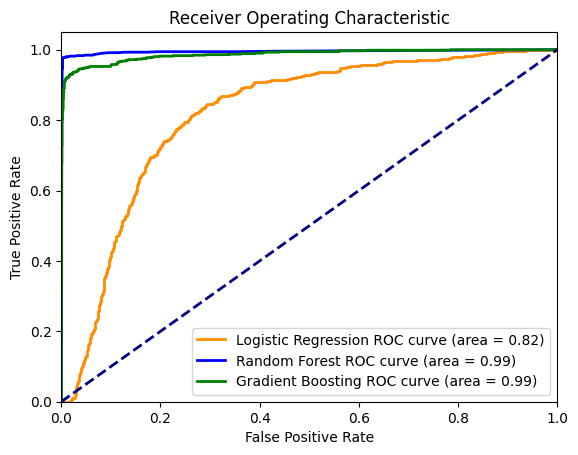

In [56]:
# Plot ROC curve for both models
plt.figure()
plt.plot(fpr_logistic, tpr_logistic, color='darkorange', lw=2, label=f'Logistic Regression ROC curve (area = {roc_auc_logistic:.2f})')
plt.plot(fpr_rfc, tpr_rfc, color='blue', lw=2, label=f'Random Forest ROC curve (area = {roc_auc_rfc:.2f})')
plt.plot(fpr_gbc, tpr_gbc, color='green', lw=2, label=f'Gradient Boosting ROC curve (area = {roc_auc_gbc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc='lower right')
plt.show()

### 6.2. Find the confusion matrix for each of the models. ###

In [60]:
y_pred = lr.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[1770  516]
 [ 171  543]]
              precision    recall  f1-score   support

           0       0.91      0.77      0.84      2286
           1       0.51      0.76      0.61       714

    accuracy                           0.77      3000
   macro avg       0.71      0.77      0.72      3000
weighted avg       0.82      0.77      0.78      3000



In [61]:
y_pred = rfc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2272   14]
 [  16  698]]
              precision    recall  f1-score   support

           0       0.99      0.99      0.99      2286
           1       0.98      0.98      0.98       714

    accuracy                           0.99      3000
   macro avg       0.99      0.99      0.99      3000
weighted avg       0.99      0.99      0.99      3000



In [62]:
y_pred = gbc.predict(X_test)
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[2226   60]
 [  45  669]]
              precision    recall  f1-score   support

           0       0.98      0.97      0.98      2286
           1       0.92      0.94      0.93       714

    accuracy                           0.96      3000
   macro avg       0.95      0.96      0.95      3000
weighted avg       0.97      0.96      0.97      3000



### 6.3. Explain which metric needs to be used from the confusion matrix: Recall or Precision? ###

###
Definition: Recall is the ratio of correctly predicted positive observations to all actual positives. It answers the question: Of all the actual positive cases, how many did we correctly identify?

Recall=True Positives​/True Positives+False Negatives

Use Case: Recall is crucial when the cost of missing a positive case is high. For example, in medical diagnostics, failing to identify a disease (false negative) can be more harmful than a false alarm (false positive).


Definition: Precision is the ratio of correctly predicted positive observations to the total predicted positives. It answers the question: Of all the cases we predicted as positive, how many were actually positive?

Formula: Precision=True Positives​/True Positives+False Positives

Use Case: Precision is important when the cost of a false positive is high. For example, in email spam detection, marking a legitimate email as spam (false positive) can be more problematic than missing a spam email (false negative).

###

### Choosing Between Recall and Precision ###

High Recall, Low Precision: Useful in scenarios where catching all positive cases is critical, even if it means having more false positives.

High Precision, Low Recall: Useful in scenarios where the cost of false positives is high, and you want to be very sure of your positive predictions.

Since for Employee Turnover missing a positive case is costly, we should choose Recall. 

Out of all the models, Rnadom Forest shows high Recall. Hence it is a good fit for this case.

## 7.Suggest various retention strategies for targeted employees. ##

### 7.1.Using the best model, predict the probability of employee turnover in the test data. ###

In [63]:
# Predict probabilities for the test set using random forest classifier model
y_prob_rfc = rfc.predict_proba(X_test)[:, 1]

# Print the predicted probabilities for employee turnover in the test data
print("Predicted probabilities of employee turnover in the test data:")
print(y_prob_rfc)

Predicted probabilities of employee turnover in the test data:
[0.   0.6  0.04 ... 0.04 0.01 1.  ]


### 7.2.Based on the probability score range below, categorize the employees into four zones and suggest your thoughts on the retention strategies for each zone.

■ Safe Zone (Green) (Score < 20%)

■ Low-Risk Zone (Yellow) (20% < Score < 60%)

■ Medium-Risk Zone (Orange) (60% < Score < 90%)

■ High-Risk Zone (Red) (Score > 90%).

###


In [66]:
# Categorize employees into zones based on probability score range
zones = []
for score in y_prob_rfc:
    if score < 0.20:
        zones.append('Safe Zone (Green)')
    elif 0.20 <= score < 0.60:
        zones.append('Low-Risk Zone (Yellow)')
    elif 0.60 <= score < 0.90:
        zones.append('Medium-Risk Zone (Orange)')
    else:
        zones.append('High-Risk Zone (Red)')

# Print the categorized zones for each employee
for i, zone in enumerate(zones):
    print(f"Employee {i+1}: {zone}")

# Suggest retention strategies for each zone
retention_strategies = {
    'Safe Zone (Green)': 'Continue to engage and motivate employees through recognition and career development opportunities.',
    'Low-Risk Zone (Yellow)': 'Monitor employee satisfaction and address any emerging concerns to prevent escalation.',
    'Medium-Risk Zone (Orange)': 'Implement targeted retention strategies such as personalized development plans and increased engagement efforts.',
    'High-Risk Zone (Red)': 'Take immediate action to address critical issues, provide support, and offer incentives to retain employees.'
}

print("\nRetention Strategies:")
for zone, strategy in retention_strategies.items():
    print(f"{zone}: {strategy}")

Employee 1: Safe Zone (Green)
Employee 2: Medium-Risk Zone (Orange)
Employee 3: Safe Zone (Green)
Employee 4: Safe Zone (Green)
Employee 5: Safe Zone (Green)
Employee 6: Safe Zone (Green)
Employee 7: Safe Zone (Green)
Employee 8: Safe Zone (Green)
Employee 9: Safe Zone (Green)
Employee 10: Safe Zone (Green)
Employee 11: High-Risk Zone (Red)
Employee 12: Safe Zone (Green)
Employee 13: High-Risk Zone (Red)
Employee 14: Safe Zone (Green)
Employee 15: Safe Zone (Green)
Employee 16: High-Risk Zone (Red)
Employee 17: Safe Zone (Green)
Employee 18: Safe Zone (Green)
Employee 19: Safe Zone (Green)
Employee 20: High-Risk Zone (Red)
Employee 21: Safe Zone (Green)
Employee 22: High-Risk Zone (Red)
Employee 23: Safe Zone (Green)
Employee 24: Safe Zone (Green)
Employee 25: Safe Zone (Green)
Employee 26: Safe Zone (Green)
Employee 27: High-Risk Zone (Red)
Employee 28: Safe Zone (Green)
Employee 29: Safe Zone (Green)
Employee 30: Safe Zone (Green)
Employee 31: Safe Zone (Green)
Employee 32: High-Risk